In [1]:
#Import of necessary libraries to work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pymysql
from sqlalchemy import create_engine
import getpass
password = getpass.getpass()

import warnings
warnings.filterwarnings('ignore')

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/self1'
engine = create_engine(connection_string)

### Reading data from MySQL Workbench DB

In [3]:
query = '''SELECT * FROM self_empl_cleared;'''

data= pd.read_sql_query(query, engine)
data.head()

,index,id,self_employment_type,branch,person_characteristics,gender,period,self_empl_persons,avg_personal_income,avg_self_empl_income
0,0,14424,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2011,1.1,31.6,18.1
1,1,14425,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2012,1.1,33.0,18.8
2,2,14426,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2013,1.2,34.8,18.9
3,3,14427,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2014,1.2,29.9,18.0
4,4,14428,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2015,1.2,28.2,17.2


In [4]:
data = data.drop('index',axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95470 entries, 0 to 95469
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      95470 non-null  int64  
 1   self_employment_type    95470 non-null  object 
 2   branch                  95470 non-null  object 
 3   person_characteristics  95470 non-null  object 
 4   gender                  95470 non-null  object 
 5   period                  95470 non-null  object 
 6   self_empl_persons       95470 non-null  float64
 7   avg_personal_income     95470 non-null  float64
 8   avg_self_empl_income    95470 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.6+ MB


## Exploratory data

In [6]:
numeric = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)

### Check the normality of the numerical variables visually

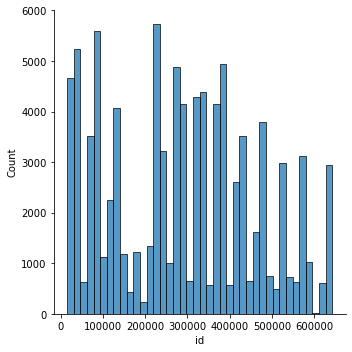

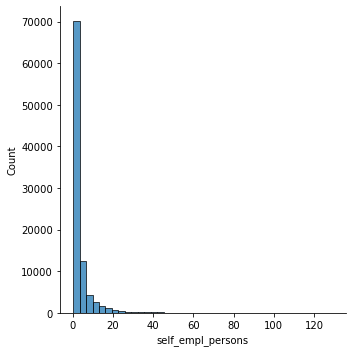

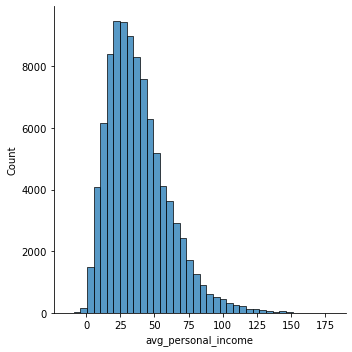

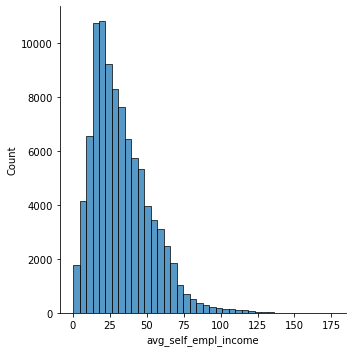

In [7]:
for i in numeric.columns:
    sns.displot(x = i, data = numeric, bins=40)
    plt.show()

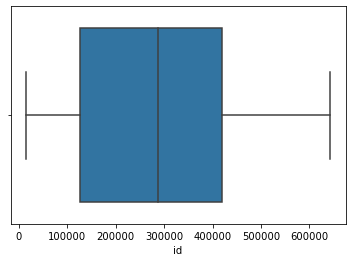

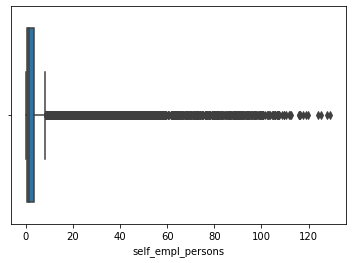

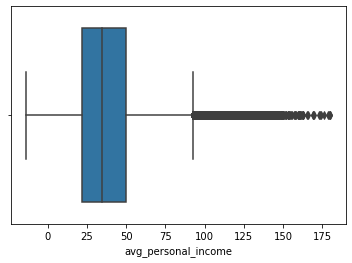

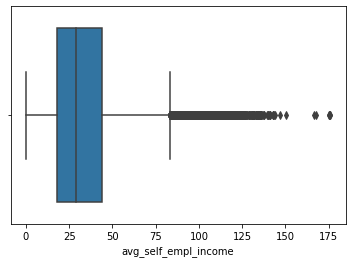

In [8]:
for i in numeric.columns:
    sns.boxplot(x = i, data = numeric)
    plt.show()

###  Removing some outliers

In [9]:
iqr_1= np.nanpercentile(numeric['avg_personal_income'],75) - np.nanpercentile(numeric['avg_personal_income'],25)
upper_limit_1 = np.nanpercentile(numeric['avg_personal_income'],75) + 1.5*iqr_1
extraordinary_points_1 = numeric[numeric['avg_personal_income'] > upper_limit_1] 

iqr_2= np.nanpercentile(numeric['avg_self_empl_income'],75) - np.nanpercentile(numeric['avg_self_empl_income'],25)
upper_limit_2 = np.nanpercentile(numeric['avg_self_empl_income'],75) + 1.5*iqr_2
extraordinary_points_3 = numeric[numeric['avg_self_empl_income'] > upper_limit_2] 

# This checks the number of points that will be removed
print('avg_personal_income:', len(extraordinary_points_1))
print('avg_self_empl_income:', len(extraordinary_points_3))

avg_personal_income: 2371
avg_self_empl_income: 1756


In [10]:
numeric = numeric[numeric['avg_personal_income'] < upper_limit_1]
numeric = numeric[numeric['avg_self_empl_income'] < upper_limit_2 ]

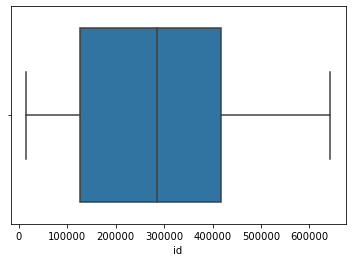

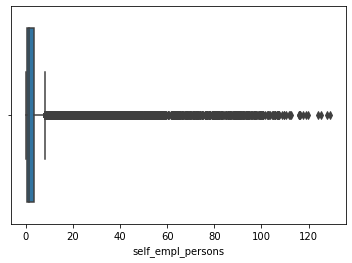

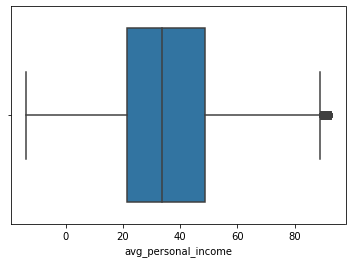

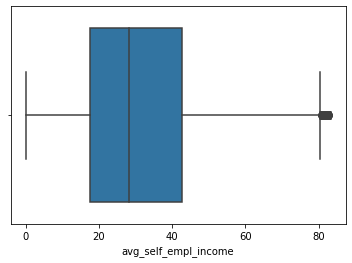

In [11]:
for i in numeric.columns:
    sns.boxplot(x = i, data = numeric)
    plt.show()

###  Check, if log-transform we have seen up to this point changes the result.

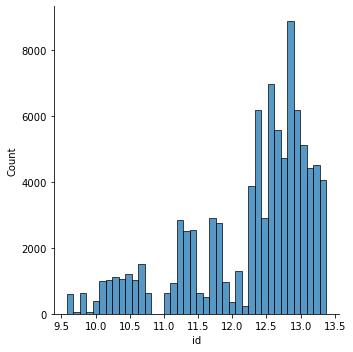

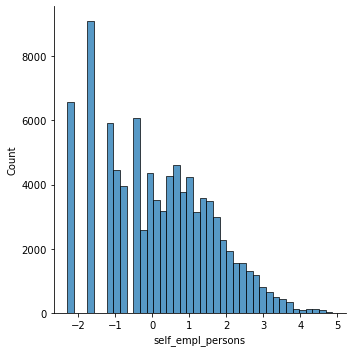

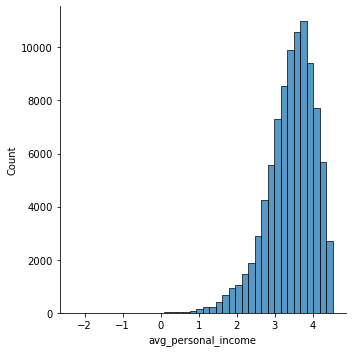

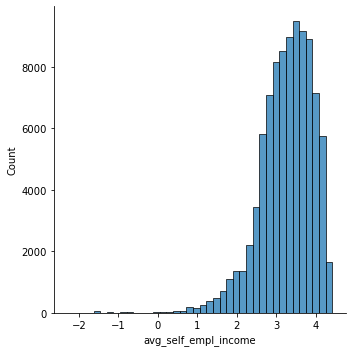

In [12]:
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

for c in numeric:
    numeric[c] = numeric[c].apply(log_transfom_clean)
    
for i in numeric.columns:
    sns.displot(x = i, data = numeric, bins=40)
    plt.show()

### Plot all the categorical variables with the proper plot

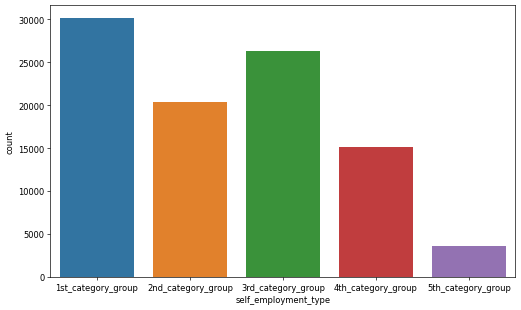

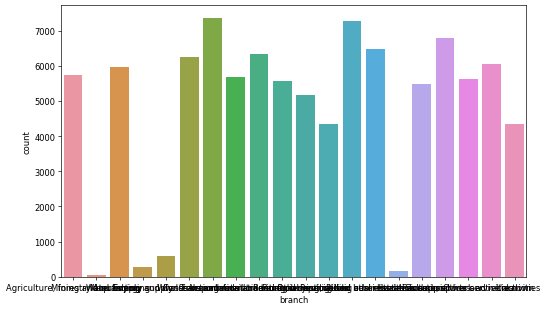

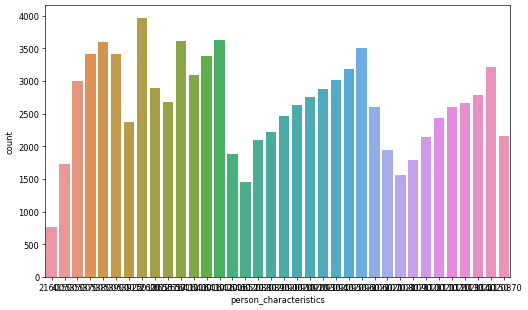

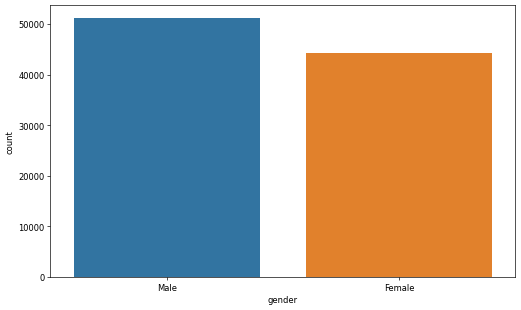

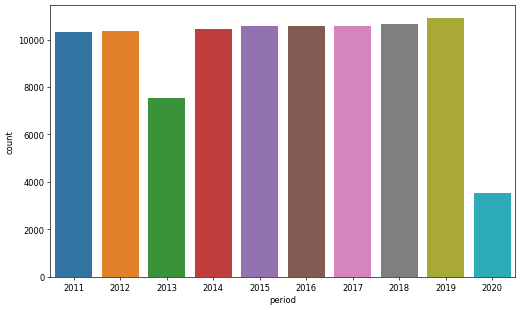

In [13]:
for i in categorical.columns:
    plt.figure(figsize=(10,6), dpi=60)
    sns.countplot(x=categorical[i], data=categorical)
    plt.show()

### Let's check more detail `person_characteristics` column.

In [14]:
type_a = ['21600', '41500', '53500', '53700', '53800', '53900', '53925']
df_age = data[data['person_characteristics'].isin(type_a) ]

In [15]:
df_age['period'].value_counts()

2019    2055
2018    2005
2017    1996
2016    1973
2015    1954
2014    1922
2013    1904
2012    1903
2011    1884
2020     694
Name: period, dtype: int64

In [16]:
df_age = df_age.rename(columns = {'person_characteristics':'age'}) 
df_age

,id,self_employment_type,branch,age,gender,period,self_empl_persons,avg_personal_income,avg_self_empl_income
0,14424,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2011,1.1,31.6,18.1
1,14425,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2012,1.1,33.0,18.8
2,14426,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2013,1.2,34.8,18.9
3,14427,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2014,1.2,29.9,18.0
4,14428,1st_category_group,"Agriculture, forestry and fishing",21600,Male,2015,1.2,28.2,17.2
...,...,...,...,...,...,...,...,...,...
94959,641922,5th_category_group,Unknown,53925,Female,2015,0.4,37.5,29.8
94960,641923,5th_category_group,Unknown,53925,Female,2016,0.4,36.7,30.0
94961,641924,5th_category_group,Unknown,53925,Female,2017,0.4,36.3,30.2
94962,641925,5th_category_group,Unknown,53925,Female,2018,0.5,30.8,27.8


In [17]:
df_age['age'].value_counts()

53800    3591
53900    3419
53700    3407
53500    3001
53925    2373
41500    1732
21600     767
Name: age, dtype: int64

In [18]:
def age_group(g):
    if g == '21600':
        g = '75 years or older'
    elif g == '41500':
        g = 'Younger than 25 years'
    elif g == '53500':
        g = '25 to 34 years'
    elif g == '53700':
        g = '35 to 44 years'
    elif g == '53800':
        g = '45 to 54 years'
    elif g == '53900':
        g = '55 to 64 years'
    elif g == '53925':
        g = '65 to 74 years'
        
    return g    

df_age['age'] = list(map(age_group, df_age['age']))

In [19]:
df_age['age'].value_counts()

45 to 54 years           3591
55 to 64 years           3419
35 to 44 years           3407
25 to 34 years           3001
65 to 74 years           2373
Younger than 25 years    1732
75 years or older         767
Name: age, dtype: int64

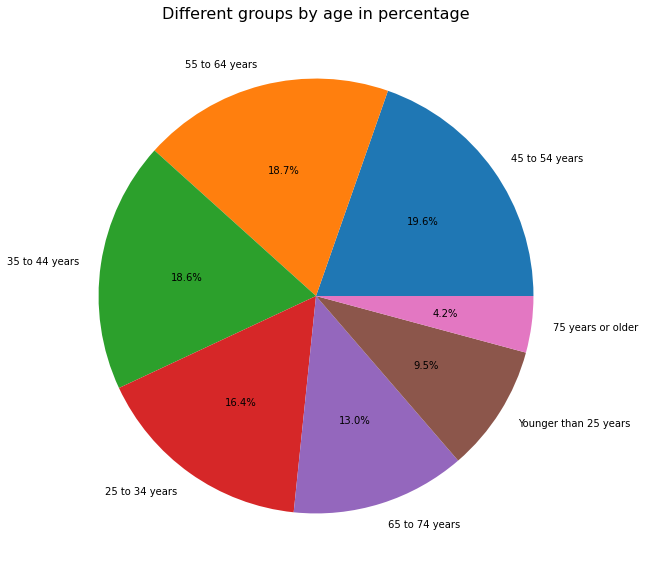

In [20]:
df_age['age'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10));
plt.title('Different groups by age in percentage', size=16)
plt.ylabel('')
plt.show()

In [21]:
df_age.to_csv('data/age_self_empl.csv', index = False)

In [22]:
type_b = ['1012600', '2012655', '2012657']
df_background = data[data['person_characteristics'].isin(type_b)]

In [23]:
df_background = df_background.rename(columns = {'person_characteristics':'background'}) 
df_background

,id,self_employment_type,branch,background,gender,period,self_empl_persons,avg_personal_income,avg_self_empl_income
136,14718,1st_category_group,"Agriculture, forestry and fishing",1012600,Male,2011,57.1,37.5,32.7
137,14719,1st_category_group,"Agriculture, forestry and fishing",1012600,Male,2012,56.2,37.4,32.2
138,14720,1st_category_group,"Agriculture, forestry and fishing",1012600,Male,2013,55.9,39.7,34.6
139,14721,1st_category_group,"Agriculture, forestry and fishing",1012600,Male,2014,55.4,39.5,34.4
140,14722,1st_category_group,"Agriculture, forestry and fishing",1012600,Male,2015,55.1,38.3,32.0
...,...,...,...,...,...,...,...,...,...
95015,642048,5th_category_group,Unknown,2012657,Female,2015,2.8,17.0,11.1
95016,642049,5th_category_group,Unknown,2012657,Female,2016,2.3,16.3,13.0
95017,642050,5th_category_group,Unknown,2012657,Female,2017,2.4,18.7,13.8
95018,642051,5th_category_group,Unknown,2012657,Female,2018,2.3,17.3,12.0


In [24]:
def background_group(g):
    if g == '1012600':
        g = 'Netherlands'
    elif g == '2012655':
        g = 'Western'
    elif g == '2012657':
        g = 'Non-western'
        
    return g    

df_background['background'] = list(map(background_group, df_background['background']))

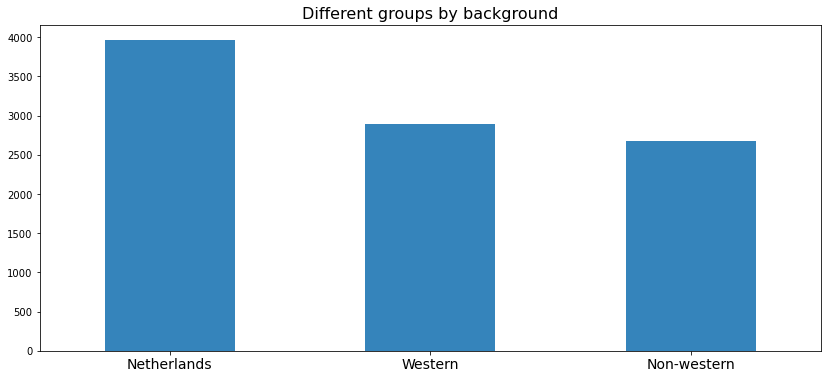

In [25]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 14,6

df_background['background'].value_counts().plot(kind = 'bar',  alpha = .9, rot = 0);
plt.title('Different groups by background', size=16)
plt.xticks(size = 14);

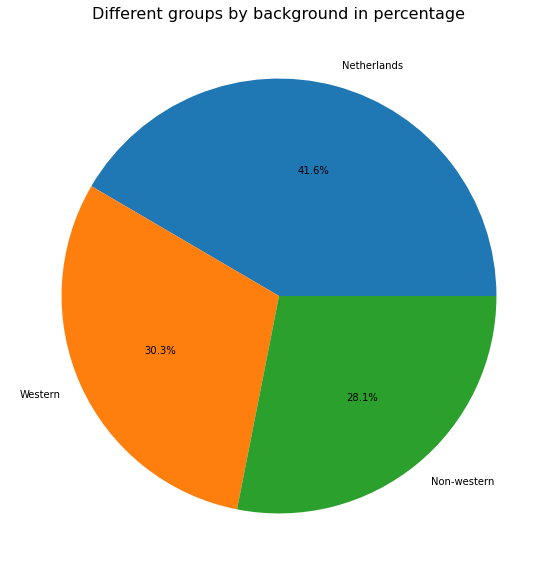

In [26]:
df_background['background'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10));
plt.title('Different groups by background in percentage', size=16)
plt.ylabel('')
plt.show()

In [27]:
df_background.to_csv('data/background_self_empl.csv', index = False)

In [28]:
type_p = ['1016411', '1016400', '1016410', '1016420', '1016445', '1016460', '1016520']
df_position_in_household = data[data['person_characteristics'].isin(type_p) ]

In [29]:
df_position_in_household = df_position_in_household.rename(columns = {'person_characteristics':'position_in_household'}) 
df_position_in_household

,id,self_employment_type,branch,position_in_household,gender,period,self_empl_persons,avg_personal_income,avg_self_empl_income
192,14844,1st_category_group,"Agriculture, forestry and fishing",1016411,Male,2011,41.2,45.2,37.7
193,14845,1st_category_group,"Agriculture, forestry and fishing",1016411,Male,2012,40.5,44.5,37.5
194,14846,1st_category_group,"Agriculture, forestry and fishing",1016411,Male,2013,40.7,46.8,39.4
195,14847,1st_category_group,"Agriculture, forestry and fishing",1016411,Male,2014,40.0,46.7,39.5
196,14848,1st_category_group,"Agriculture, forestry and fishing",1016411,Male,2015,39.1,46.4,38.0
...,...,...,...,...,...,...,...,...,...
95125,642342,5th_category_group,Unknown,1016520,Female,2015,0.4,10.9,6.7
95126,642343,5th_category_group,Unknown,1016520,Female,2016,0.3,13.7,9.8
95127,642344,5th_category_group,Unknown,1016520,Female,2017,0.3,12.8,8.6
95128,642345,5th_category_group,Unknown,1016520,Female,2018,0.4,11.7,8.0


In [30]:
df_position_in_household['position_in_household'].value_counts()

1016420    3633
1016411    3605
1016410    3380
1016400    3087
1016460    1881
1016520    1455
Name: position_in_household, dtype: int64

In [31]:
def household_group(g):
    if g == '1016411':
        g = 'Main earner'
    elif g == '1016400':
        g = 'Main earner without partner'
    elif g == '1016410':
        g = 'Main earner with partner'
    elif g == '1016420':
         g = 'Partner of main earnerr'
    elif g == '1016460':
        g = 'Child of age'
    elif g == '1016520':
        g = 'Other member'
            
    return g    

df_position_in_household['position_in_household'] = list(map(household_group, df_position_in_household['position_in_household']))

In [32]:
df_position_in_household['position_in_household'].value_counts()

Partner of main earnerr        3633
Main earner                    3605
Main earner with partner       3380
Main earner without partner    3087
Child of age                   1881
Other member                   1455
Name: position_in_household, dtype: int64

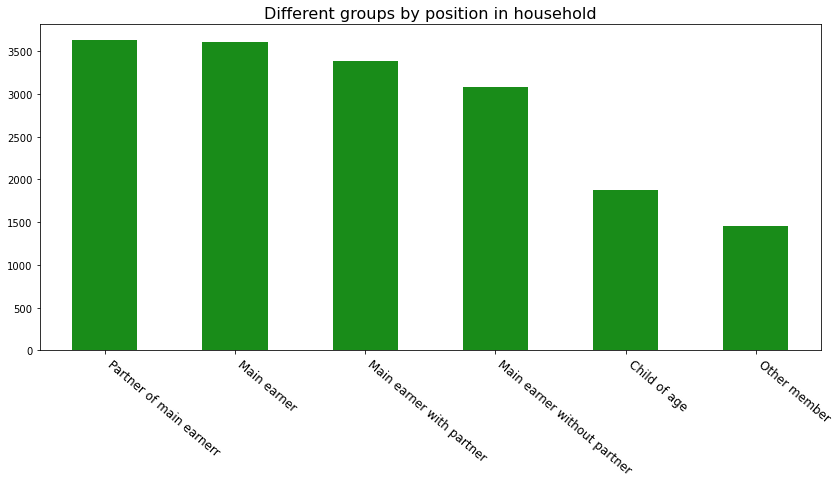

In [33]:
df_position_in_household['position_in_household'].value_counts().plot(kind = 'bar', color = 'g', alpha = .9, rot = 0);

plt.title('Different groups by position in household', size=16)
plt.xticks(rotation = "-40", ha = 'left', size = 12);
rcParams['figure.figsize'] = 14,6

In [34]:
df_position_in_household.to_csv('data/household_self_empl.csv', index = False)